<a href="https://colab.research.google.com/github/RomanKunal/Machine-Learning/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [3]:
#Set the pixel
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
#Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

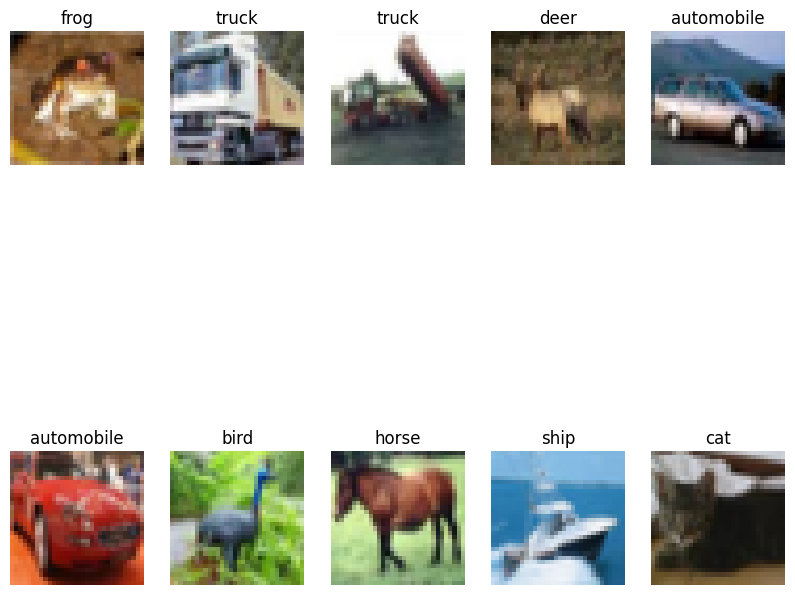

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[np.argmax(y_train[i])])
  plt.axis('off')
plt.show()

In [6]:
#Convolutional and pooling layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#compiling the model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.3253 - loss: 1.8177 - val_accuracy: 0.5073 - val_loss: 1.3768
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5362 - loss: 1.2951 - val_accuracy: 0.5874 - val_loss: 1.2004
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6061 - loss: 1.1156 - val_accuracy: 0.6307 - val_loss: 1.0552
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6481 - loss: 1.0041 - val_accuracy: 0.6525 - val_loss: 0.9905
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6817 - loss: 0.9177 - val_accuracy: 0.6635 - val_loss: 0.9596
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7016 - loss: 0.8589 - val_accuracy: 0.6906 - val_loss: 0.8971
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.7098 - loss: 0.8237 - val_accuracy: 0.6777 - val_loss: 0.9517
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.7319 - loss: 0.7653 - 

In [19]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.7012 - loss: 0.8761
Test accuracy: 0.701200008392334


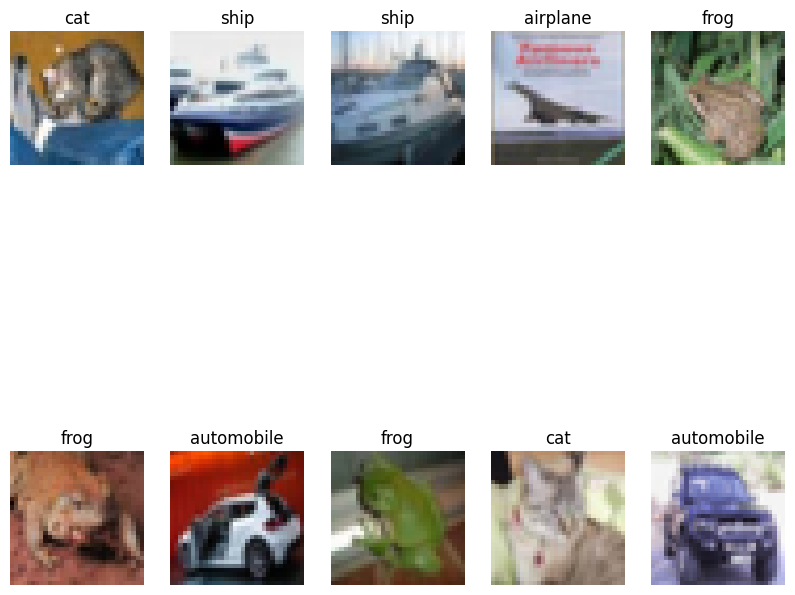

In [20]:
# display predictions
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  plt.title(class_names[np.argmax(y_test[i])])
  plt.axis('off')
plt.show()

In [21]:
#save the model
model.save('classify.keras')


#load the saved model
model = tf.keras.models.load_model('classify.keras')

In [24]:
# Path to the image
import numpy as np
from tensorflow.keras.preprocessing import image
image_path = "/content/white-horse.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(32, 32)) # Resize to match input size
img_array = image.img_to_array(img) # Convert to array
img_array = img_array / 255.0 # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


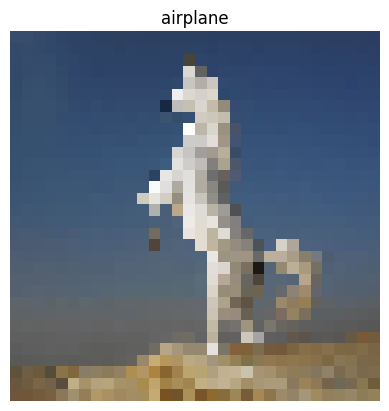

In [25]:
plt.imshow(img)
plt.title(class_names[np.argmax(model.predict(img_array))])
plt.axis('off')
plt.show()